In [1]:
#Importing of dependencies, maybe don't need all?
import matplotlib.pyplot as plt
import csv
import numpy as np
from numpy.polynomial.polynomial import polyfit as poly
import statsmodels.api as sm
import scipy as stats
import pandas as pd
from sklearn import linear_model
from pprint import pprint

In [2]:
#read our Fangraphs data from the following links:
total = pd.read_csv("Resources/Barton.csv")

total.head()

,Season,Name,Team,G,PA,HR,R,RBI,SB,BB%,...,AVG,OBP,SLG,wOBA,wRC+,BsR,Off,Def,WAR,playerid
0,1923,Babe Ruth,Yankees,152,699,41,151,131.0,17.0,24.3 %,...,0.393,0.545,0.764,0.571,231,-3.2,117.3,12.6,15.0,1011327
1,1921,Babe Ruth,Yankees,152,693,59,177,171.0,17.0,20.9 %,...,0.378,0.512,0.846,0.575,224,0.2,119.2,-0.2,13.9,1011327
2,1920,Babe Ruth,Yankees,142,615,54,158,137.0,14.0,24.4 %,...,0.376,0.533,0.849,0.598,239,-0.3,110.9,-4.7,13.3,1011327
3,1927,Babe Ruth,Yankees,151,691,60,158,164.0,7.0,19.8 %,...,0.356,0.486,0.772,0.545,212,-1.8,102.7,5.5,13.0,1011327
4,2002,Barry Bonds,Giants,143,612,46,117,110.0,9.0,32.4 %,...,0.370,0.582,0.799,0.544,244,-1.2,108.9,-2.0,12.7,1109


In [3]:
bartons = total[total.OBP - total.AVG >= .1]
bartons = total[total.OBP > total.SLG]
bartons = bartons.sort_values(by=['Season'], ascending=False)

In [4]:
round(bartons.describe(),3)

,Season,G,PA,HR,R,RBI,SB,ISO,BABIP,AVG,OBP,SLG,wOBA,wRC+,BsR,Off,Def,WAR,playerid
count,1550.000,1550.000,1550.000,1550.000,1550.000,1536.000,1490.000,1550.000,1155.000,1550.000,1550.000,1550.000,1550.000,1550.000,1550.000,1550.000,1550.000,1550.000,1550.000
mean,1929.634,132.368,560.995,1.850,70.864,43.320,21.618,0.063,0.282,0.259,0.345,0.322,0.322,94.601,0.494,-2.221,2.505,1.970,954671.874
std,36.257,22.916,103.534,2.264,23.092,15.488,18.044,0.023,0.033,0.034,0.047,0.046,0.044,23.923,2.639,15.908,9.793,1.842,223970.534
min,1871.000,7.000,28.000,0.000,3.000,0.000,0.000,0.000,0.098,0.074,0.097,0.074,0.087,-100.000,-8.400,-51.700,-28.500,-2.800,10.000
25%,1902.000,125.000,515.000,0.000,55.000,33.000,8.000,0.047,0.260,0.238,0.316,0.294,0.294,80.000,-1.000,-12.975,-4.500,0.700,1002858.750
50%,1917.000,136.000,570.500,1.000,69.000,42.000,17.000,0.061,0.282,0.258,0.345,0.322,0.322,94.000,0.000,-3.200,1.400,1.800,1006604.000
75%,1959.750,147.750,626.000,3.000,84.000,52.000,30.000,0.077,0.304,0.280,0.374,0.350,0.349,111.000,1.500,8.200,8.700,3.100,1010771.000
max,2012.000,163.000,757.000,17.000,156.000,107.000,138.000,0.176,0.395,0.391,0.547,0.463,0.494,178.000,17.700,68.300,43.700,9.300,1014441.000


In [5]:
bartons.Name.mode()

0    Donie Bush
dtype: object

In [6]:
livebartons = bartons[bartons.Season > 1919]
livebartons.head()

,Season,Name,Team,G,PA,HR,R,RBI,SB,BB%,...,AVG,OBP,SLG,wOBA,wRC+,BsR,Off,Def,WAR,playerid
10483,2012,Jamey Carroll,Twins,138,537,1,65,40.0,9.0,9.7 %,...,0.268,0.343,0.317,0.299,86,-1.8,-10.4,7.3,1.6,1591
14308,2012,Jemile Weeks,Athletics,118,511,2,54,20.0,16.0,9.8 %,...,0.221,0.305,0.304,0.276,73,2.1,-14.0,-4.9,-0.2,2498
9109,2011,Jamey Carroll,Dodgers,146,510,0,52,17.0,10.0,9.2 %,...,0.290,0.359,0.347,0.317,103,4.0,5.5,-1.5,2.1,1591
11677,2011,Jason Bartlett,Padres,139,618,2,61,40.0,23.0,7.8 %,...,0.245,0.308,0.307,0.279,79,0.6,-14.1,6.2,1.1,8219
14789,2011,Juan Pierre,White Sox,158,711,2,80,50.0,27.0,6.0 %,...,0.279,0.329,0.327,0.296,80,5.3,-11.6,-17.8,-0.6,443


In [7]:
llivebartons = livebartons[livebartons['PA'] >300]

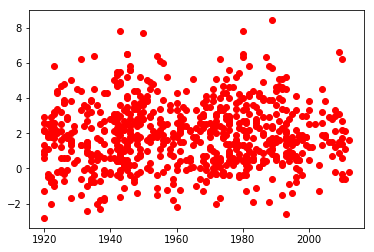

In [8]:
plt.scatter(llivebartons.Season, llivebartons.WAR, c='r')

In [15]:
totes = livebartons.groupby('Season').sum().reset_index()
counts = livebartons.groupby('Season').count().reset_index()
totes.head()

,Season,G,PA,HR,R,RBI,SB,ISO,BABIP,AVG,OBP,SLG,wOBA,wRC+,BsR,Off,Def,WAR,playerid
0,1920,1368,5813,11,656,403.0,152.0,0.577,2.779,2.617,3.359,3.191,3.172,833,8.8,-105.9,6.4,9.4,10074048
1,1921,768,3317,4,440,246.0,80.0,0.341,1.863,1.756,2.258,2.096,2.087,563,4.4,-26.3,-20.0,6.5,6035087
2,1922,1545,6664,20,827,573.0,144.0,0.706,3.138,2.986,3.879,3.694,3.629,927,-2.6,-138.9,33.8,11.5,11106864
3,1923,1432,6246,24,791,546.0,125.0,0.752,3.004,2.833,3.724,3.587,3.515,961,-2.9,-32.2,36.6,20.8,10070671
4,1924,887,3662,14,415,464.0,57.0,0.464,1.825,1.715,2.276,2.178,2.139,590,-5.7,-9.8,44.3,16.0,6053192


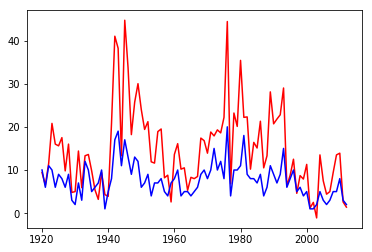

In [17]:
plt.plot(totes.Season, totes.WAR, c='r')
plt.plot(totes.Season, counts.WAR, c='b')


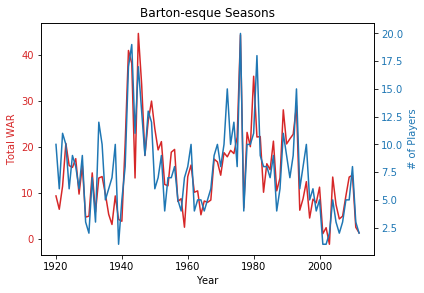

In [19]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Total WAR', color=color)
ax1.plot(totes.Season, totes.WAR, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('# of Players', color=color)  # we already handled the x-label with ax1
ax2.plot(totes.Season, counts.WAR, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Barton-esque Seasons')
plt.show()